<a href="https://colab.research.google.com/github/ric-clemente/Crypto_Sentiment_vs_Price/blob/master/Crypto_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
!pip install twitterscraper==1.1
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



     |████████████████████████████████| 92kB 6.3MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.1.0-cp36-none-any.whl size=9915 sha256=34e3374a657e7de20f6c104394486457cca7f1d1e88afc6a0449c758e1473869
  Stored in directory: /root/.cache/pip/wheels/69/fe/f1/b3eb104388ec7e18e5c6f11afc9251ec483949d38b4ff453b3
Successfully built twitterscraper
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [57]:

from twitterscraper import query_tweets
import datetime as dt
import pandas as pd

begin_date=dt.date(2017,11,5)
end_date=dt.date(2018,2,28)
#end_date=dt.date(2017,11,30)
#begin_date=dt.date(2019,6,1)
#end_date=dt.date(2019,8,16)
limit = 40000
lang = 'english'

tweets= query_tweets("btc or bitcoin",begindate=begin_date,enddate=end_date,limit=limit,lang=lang)
#fill dataframe with one row per object, one attribute per column
df=pd.DataFrame([t.__dict__ for t in tweets])




INFO: queries: ['btc or bitcoin since:2017-11-05 until:2017-11-10', 'btc or bitcoin since:2017-11-10 until:2017-11-16', 'btc or bitcoin since:2017-11-16 until:2017-11-22', 'btc or bitcoin since:2017-11-22 until:2017-11-28', 'btc or bitcoin since:2017-11-28 until:2017-12-03', 'btc or bitcoin since:2017-12-03 until:2017-12-09', 'btc or bitcoin since:2017-12-09 until:2017-12-15', 'btc or bitcoin since:2017-12-15 until:2017-12-21', 'btc or bitcoin since:2017-12-21 until:2017-12-26', 'btc or bitcoin since:2017-12-26 until:2018-01-01', 'btc or bitcoin since:2018-01-01 until:2018-01-07', 'btc or bitcoin since:2018-01-07 until:2018-01-13', 'btc or bitcoin since:2018-01-13 until:2018-01-18', 'btc or bitcoin since:2018-01-18 until:2018-01-24', 'btc or bitcoin since:2018-01-24 until:2018-01-30', 'btc or bitcoin since:2018-01-30 until:2018-02-05', 'btc or bitcoin since:2018-02-05 until:2018-02-10', 'btc or bitcoin since:2018-02-10 until:2018-02-16', 'btc or bitcoin since:2018-02-16 until:2018-02-2

In [5]:
df.head(15)


,fullname,html,id,likes,replies,retweets,text,timestamp,url,user
0,Monopoly 🇺🇸,"<p class=""TweetTextSize js-tweet-text tweet-te...",934569332339761152,1,0,0,SUBSTRATUM is on fire and the smoke is still b...,2017-11-25 23:47:46,/MonopolyExposed/status/934569332339761152,MonopolyExposed
1,Alex Luecke,"<p class=""TweetTextSize js-tweet-text tweet-te...",934568639360929797,1,1,0,Something I don't understand about Bitcoin cor...,2017-11-25 23:45:01,/AML11/status/934568639360929797,AML11
2,Jimmy Song (송재준),"<p class=""TweetTextSize js-tweet-text tweet-te...",934566946393264128,166,17,24,"OK, I'm willing to sweeten the pot here. If yo...",2017-11-25 23:38:18,/jimmysong/status/934566946393264128,jimmysong
3,Anna Sokologorskaya,"<p class=""TweetTextSize js-tweet-text tweet-te...",934566848900878336,0,0,0,@forex @btc @fx #bitcoin US Regulators Debate ...,2017-11-25 23:37:54,/AnnaSokologors2/status/934566848900878336,AnnaSokologors2
4,💀Matt / HYP3R 🚀 @PaxAus,"<p class=""TweetTextSize js-tweet-text tweet-te...",934566121688129536,1,1,1,"For those interested in #Bitcoin, old mate @ra...",2017-11-25 23:35:01,/hyp3rstrike/status/934566121688129536,hyp3rstrike
5,1Foxy.com,"<p class=""TweetTextSize js-tweet-text tweet-te...",934564117452599296,0,0,0,Are You Bullish Or Bearish On #Oil? Start #Tra...,2017-11-25 23:27:03,/ElixiumTV/status/934564117452599296,ElixiumTV
6,TrollboxOne.com,"<p class=""TweetTextSize js-tweet-text tweet-te...",934562785559810049,1,0,1,What will have higher 48hr return $BTG or $vtc...,2017-11-25 23:21:46,/trollbox_one/status/934562785559810049,trollbox_one
7,BigBlockers,"<p class=""TweetTextSize js-tweet-text tweet-te...",934561089244643328,1,0,0,The current price of Bitcoin is $8722.09.\nThe...,2017-11-25 23:15:01,/big_blockers/status/934561089244643328,big_blockers
8,Elixium Capital,"<p class=""TweetTextSize js-tweet-text tweet-te...",934560607973625857,1,0,0,Are You Bullish Or Bearish On #Bitcoin? Start ...,2017-11-25 23:13:06,/ElixiumCapital/status/934560607973625857,ElixiumCapital
9,Crypto Waifu 🦄 🌸 🌈,"<p class=""TweetTextSize js-tweet-text tweet-te...",934560355715600385,0,0,0,Are You Bullish Or Bearish On #Bitcoin? Start ...,2017-11-25 23:12:06,/BitcoinWaifu/status/934560355715600385,BitcoinWaifu


In [0]:
#convert all text to lowercase
df['text'] = [str(i).lower() for i in df['text']] 
#remove pontuation
df["text"] = df['text'].str.replace('[^\w\s]','')
#remove white spaces
df['text'] = df['text'].str.strip()
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace('\d+', '', case=False)
df['text'] = df['text'].str.replace('#', '', case=False)
df['text'] = df['text'].str.replace('^RT[\s]+', '', case=False)
df['text'] = df['text'].str.replace('mon|monday|tue|tuesday|wed|wednsday|thur|thursday|fri|friday|sat|saturday|sun|sunday', '', case=False)
df['text'] = df['text'].str.replace('jan|january|fev|february|mar|march|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december', '', case=False)

import re
import string
#!pip install --user -U nltk

#df['text'] = df['text'].str.replace(r'\$\w*', '', case=False)
#df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
#remove stop words (“the”, “a”, “on”, “is”, “all”) and save the words in a list. Each position of the list contains the words of 1 tweet
def pre_proc_text(message_list):
  
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  from nltk.stem import PorterStemmer
  from nltk.stem import WordNetLemmatizer

  

  
  #nltk.download('stopwords')
  #nltk.download('punkt')
  #nltk.download('wordnet')

  stop_words = set(stopwords.words('english'))
  result=['']*len(message_list)

  # Happy Emoticons
  emoticons_happy = set([
      ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
      ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
      '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
      'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
      '<3'
      ])

  # Sad Emoticons
  emoticons_sad = set([
      ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
      ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
      ':c', ':{', '>:\\', ';('
      ])

  # all emoticons (happy + sad)
  emoticons = emoticons_happy.union(emoticons_sad)
 


  for i in range(len(message_list)):
    

    tokens = word_tokenize(message_list[i])

    result[i]=[j for j in tokens if not j in stop_words]

    #result[i]=[j for j in tokens if not j in emoticons]

    stemmer= PorterStemmer()
    result[i]=[stemmer.stem(j) for j in result[i]] 

    lemmatizer=WordNetLemmatizer()  
    result[i]=[lemmatizer.lemmatize(j) for j in result[i]] 

    
  return result  

def clean_msg(m_list):
  
  df_m_list = pd.DataFrame.from_dict({'text':m_list})
  
  #print(df_m_list)
  df_m_list['text'] = [str(i).lower() for i in df_m_list['text']] 
  #remove pontuation
  df_m_list['text'] = df_m_list['text'].str.replace('[^\w\s]','')
  #remove white spaces
  df_m_list['text'] = df_m_list['text'].str.strip()
  df_m_list['text'] = df_m_list['text'].str.replace('http\S+|www.\S+', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('\d+', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('#', '', case=False) 
  df_m_list['text'] = df_m_list['text'].str.replace('^RT[\s]+', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('mon|monday|tue|tuesday|wed|wednsday|thur|thursday|fri|friday|sat|saturday|sun|sunday', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('jan|january|fev|february|mar|march|may|jun|june|jul|july|aug|august|sep|september|oct|october|nov|november|dec|december', '', case=False)
  df_m_list['text'] = df_m_list['text'].str.replace('@[A-Za-z0-9]+','', case=False)
  
  clean_m_list=pre_proc_text(df_m_list['text'])
  return clean_m_list


In [58]:
#words from the tweet number 1
clean_tweets=clean_msg(df['text'])
print(clean_tweets[26])
#s = [i for i in clean_tweets[26]] 
#res = " ".join(s)
#print(res)

['would', 'perfect', 'big', 'hodler', 'like', 'roger', 'ver', 'sold', 'btc', 'assum', 'alreadi', 'bitcoincor', 'crash', 'still', 'buy', 'core', 'cuz', 'end', 'day', 'one', 'give', 'fuck', 'roger', 'ver', 'spend', 'bitcoin', 'faster']


In [0]:
from google.colab import files


def extract_words(file_name):
  try:
    file= open(file_name,"r",  encoding="ISO-8859-1")
  except:
    print(file_name)
    uploaded = files.upload()  
    file= open(file_name,"r",  encoding="ISO-8859-1")
  
  
  words=[]
  for line in file:

      
      if line[0]!=";" and line[0]!='\n':
        line=line.rstrip("\n")
        words.append(line)
        
  return words

#positive_words=[]
#negative_words=[]
#positive_words=extract_words('positive-words.txt')  
#negative_words=extract_words('negative-words.txt')  

#print("positive words\n",positive_words)
#print("negative words\n",negative_words)

In [23]:
positive_pol=[]
negative_pol=[]
positive_pol=extract_words('rt-polarity.pos')  
negative_pol=extract_words('rt-polarity.neg')  

print("positive words\n",positive_pol[:3])
print("negative words\n",negative_pol[:3])

rt-polarity.pos


Saving rt-polarity.pos to rt-polarity.pos
rt-polarity.neg


Saving rt-polarity.neg to rt-polarity.neg
positive words
 ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . ', 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth . ', 'effective but too-tepid biopic']
negative words
 ['simplistic , silly and tedious . ', "it's so laddish and juvenile , only teenage boys could possibly find it funny . ", 'exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . ']


In [24]:

X=[]  
y=[]  
clean_pol_pos=clean_msg(positive_pol)
for i in range(len(clean_pol_pos)):
  y.append(1)
  
clean_pol_neg=clean_msg(negative_pol)
for i in range(len(clean_pol_neg)):
  y.append(-1)
print(clean_pol_pos[3])
print(clean_pol_neg[3])

#X = clean_pol_pos + clean_pol_neg

#print(X[3])


['sometim', 'like', 'go', 'movi', 'fun', 'wasabi', 'good', 'place', 'start']
['garbu', 'discard', 'potenti', 'patholog', 'studi', 'exhum', 'instead', 'ske', 'melodrama', 'circumstanti', 'situat']


In [0]:
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVR
from sklearn.naive_bayes import GaussianNB
import random
import numpy as np

def dic(list_words):
  vocab = []
  
  for i in range(len(list_words)):
      for w in list_words[i]:
        if w not in vocab:
          vocab.append(w)
      
  vocab = sorted(list(set(vocab)))
  return vocab
  #print(vocab[:10])
def count_words(vocab,list_words):  
  bag_vector = [[0]*len(vocab)]*len(list_words)  
  #print(bag_vector[0])
  for i in range(len(list_words)):   
      bag_vector[i]=np.zeros(len(vocab))
      #print(bag_vector[i])
      for w in list_words[i]:
          for j in range(len(vocab)):
              if vocab[j] == w: 
                bag_vector[i][j] = bag_vector[i][j] + 1 
     
                  
                  
      

  
  #print(bag_vector[:10])
  
  return bag_vector



In [26]:
dicionary_pol=dic(clean_pol_pos+ clean_pol_neg) 

X=count_words(dicionary_pol,clean_pol_pos+ clean_pol_neg)   
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
y=y.ravel()

print(len(X),len(y)) #para depois dar certo aqui

nr_random=random.randint(2,50)
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state=nr_random)

from sklearn.naive_bayes import MultinomialNB



model_pol = MultinomialNB()
#from sklearn.svm import SVC
#model_pol = SVC(kernel='linear', C=1E10)

#model_pol = Perceptron()
#model_pol = LinearSVR(random_state=0, tol=1e-5)
clf=model_pol.fit(X_train_pol,y_train_pol)
score_train = model_pol.score(X_train_pol, y_train_pol)
score_test = model_pol.score(X_test_pol, y_test_pol)


print("Accuracy Train NB:", score_train)
print("Accuracy Test NB:", score_test)
score_total=clf.score(X_test_pol,y_test_pol)
print("total",score_total)

10662 10662
Accuracy Train NB: 0.9146441552350804
Accuracy Test NB: 0.7585560243788092
total 0.7585560243788092


In [27]:
sub=[]
obj=[]
sub=extract_words('quote.tok.gt9.5000')  
obj=extract_words('plot.tok.gt9.5000')  

print("subjetive words\n",sub[:3])
print("objective words\n",obj[:3])





quote.tok.gt9.5000


Saving quote.tok.gt9.5000 to quote.tok.gt9.5000
plot.tok.gt9.5000


Saving plot.tok.gt9.5000 to plot.tok.gt9.5000
subjetive words
 ['smart and alert , thirteen conversations about one thing is a small gem . ', 'color , musical bounce and warm seas lapping on island shores . and just enough science to send you home thinking . ', 'it is not a mass-market entertainment but an uncompromising attempt by one artist to think about another . ']
objective words
 ['the movie begins in the past where a young boy named sam attempts to save celebi from a hunter . ', 'emerging from the human psyche and showing characteristics of abstract expressionism , minimalism and russian constructivism , graffiti removal has secured its place in the history of modern art while being created by artists who are unconscious of their artistic achievements . ', "spurning her mother's insistence that she get on with her life , mary is thrown out of the house , rejected by joe , and expelled from school as she grows larger with child . "]


In [28]:
X=[]  
y=[]  
clean_sub=clean_msg(sub)
for i in range(len(clean_sub)):
  y.append(1)
  
clean_obj=clean_msg(obj)
for i in range(len(clean_obj)):
  y.append(-1)
print(clean_sub[3])
print(clean_obj[3])

['lightheart', 'french', 'film', 'spiritu', 'quest', 'fashion', 'model', 'seek', 'peac', 'mind', 'love', 'affair', 'veterinarian', 'nonpract', 'jew']
['amitabh', 'cant', 'believ', 'board', 'director', 'mind', 'fill', 'reveng', 'better', 'reveng', 'rob', 'bank', 'iron', 'sound']


In [29]:
dicionary_sub=dic(clean_sub+ clean_obj)       
X=count_words(dicionary_sub,clean_sub+ clean_obj)   
X=np.array(X)
y=np.array(y)
y=y.reshape(-1,1)
y=y.ravel()

print(len(X),len(y)) #para depois dar certo aqui

nr_random=random.randint(2,50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state=nr_random)


model_sub = MultinomialNB()
clf=model_sub.fit(X_train,y_train)
score_train = model_sub.score(X_train, y_train)
score_test = model_sub.score(X_test, y_test)


print("Accuracy Train NB:", score_train)
print("Accuracy Test NB:", score_test)
score_total=clf.score(X_test,y_test)
print("total",score_total)

10000 10000
Accuracy Train NB: 0.956
Accuracy Test NB: 0.9115
total 0.9115


In [0]:

def classify_msg(original_msg):
  msg=clean_msg([original_msg])
  #msg=clean_tweets[:20]
  #print(msg)

  msg_vector=count_words(dicionary_sub,msg)
  #msg=np.array(msg)


  #print(msg)
  y_sub = model_sub.predict(msg_vector)
  #print(y_sub)
  
  if y_sub==1:
    msg_vector=count_words(dicionary_pol,msg)
    y_pol = model_pol.predict(msg_vector)
    if y_pol==1:
      return "Positive"
    else:
      return "Negative"
  else:
    return "Neutral"
#print(df['text'][:20])

In [0]:
import datetime
df['dates'] = df['timestamp'].dt.date
df.drop(['fullname','html','replies','retweets','id','timestamp','url','user'],axis=1,inplace=True)

In [60]:
positive=0
negative=0
neutral=0

day_pos=[]
day_neg=[]
day_neut=[]
day=[]
day_sample=[]
labels=[]
#print(df['likes'][3])
for i in range (len( df['dates'])):
  
  classification=classify_msg(df['text'][i])
  if int(df['likes'][i])>=10:
    
    
    if classification=='Positive':
      positive=positive+1
    if classification=='Negative':
      negative=negative+1
    if classification=='Neutral':
      neutral=neutral+1          
  if i>0:

    if df['dates'][i]!=df['dates'][i-1]:  
      #print("true")
      day.append(str(df['dates'][i-1]))
      if positive+negative>0:
        day_pos.append(positive/(positive+negative))
        day_neg.append(negative/(positive+negative))
        day_sample.append(positive+negative)
      else:
        day_pos.append(0)
        day_neg.append(0)        
        day_sample.append(0)        
      #day_neut.append(neutral/(positive+negative+neutral))
      positive=0
      negative=0
      neutral=0
  labels.append(classification)  
      
#add last date
if int(df['likes'][i])>=10:
  day.append(str(df['dates'][i]))
  day_pos.append(positive/(positive+negative))
  day_neg.append(negative/(positive+negative))
  day_sample.append(positive+negative)        
#day_neut.append(neutral/(positive+negative+neutral))      



print(day_pos)     
print(day_neg)     
print(day_sample)     
#print(day_neut)
print(day)


[0, 0.0, 0, 1.0, 0, 0.5, 0.5714285714285714, 0.2, 0.3333333333333333, 0.5, 0.4, 0.4, 0.5, 0.3333333333333333, 0.0, 0.3333333333333333, 0.5, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.3333333333333333, 0.4, 0.5454545454545454, 0.0, 0.3333333333333333, 0.0, 0.8, 0.0, 0.3333333333333333, 0.0, 0.16666666666666666, 0.2, 0.8, 0.0, 0.75, 0.0, 0.08333333333333333, 0.45454545454545453, 0.5, 1.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.42857142857142855, 0.0, 0.5, 0.5, 0.25, 0.75, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 0.25, 0.25, 0.0, 0.2, 1.0, 0.6666666666666666, 0.5, 0.6, 0.5, 0.0, 0.375, 0.25, 0.5555555555555556, 0.2857142857142857, 0.2, 0.25, 0.25, 0.6666666666666666, 0.5, 0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333, 0.25, 0.6, 0.6666666666666666, 0.14285714285714285, 0.25, 0.4, 0.5, 0.25, 0.0, 0.6666666666666666, 0.0, 1.0, 0.6666666666666666, 0.0, 0.3333333333333333, 0.25, 0.0, 1.0, 0.5, 0.2, 0.42857142857142855, 0.2, 0.75, 0.0, 0.33333333333

In [61]:
date_dic={x:i for i,x in enumerate(day)}
print(date_dic)

{'2017-11-09': 0, '2017-11-08': 1, '2017-11-07': 2, '2017-11-06': 3, '2017-11-05': 4, '2017-12-02': 5, '2017-12-01': 6, '2017-11-30': 7, '2017-11-29': 8, '2017-11-28': 9, '2017-11-27': 10, '2017-11-26': 11, '2017-11-25': 12, '2017-11-24': 13, '2017-11-23': 14, '2017-11-22': 15, '2017-11-21': 16, '2017-11-20': 17, '2017-11-19': 18, '2017-11-18': 19, '2017-11-17': 20, '2017-11-16': 21, '2018-02-09': 22, '2018-02-08': 23, '2018-02-07': 24, '2018-02-06': 25, '2018-02-05': 26, '2017-11-15': 27, '2017-11-14': 28, '2017-11-13': 29, '2017-11-12': 30, '2017-11-11': 31, '2017-11-10': 32, '2018-02-15': 33, '2018-02-14': 34, '2018-02-13': 35, '2018-02-12': 36, '2018-02-11': 37, '2018-02-10': 38, '2017-12-08': 39, '2017-12-07': 40, '2017-12-06': 41, '2017-12-05': 42, '2017-12-04': 43, '2017-12-03': 44, '2017-12-31': 45, '2017-12-30': 46, '2017-12-29': 47, '2017-12-28': 48, '2017-12-27': 49, '2017-12-26': 50, '2018-02-21': 51, '2018-02-20': 52, '2018-02-19': 53, '2018-02-18': 54, '2018-02-17': 55, '

In [0]:
df['classification']=labels
pd.set_option('display.max_colwidth', 200)

def nlp_sentences(ct):
  res=[]
  for i in range (len(ct)):
    s = [j for j in ct[i]] 
    res.append(" ".join(s))

  return res

clean_tweets=nlp_sentences(clean_tweets)
#print(clean_tweets[:3])
df['NLP']=clean_tweets



In [63]:
df.head(40)

,likes,text,dates,classification,NLP
0,0,Please share a bit or an entire @bitcoin 1EApfAbpN6y4A77dj8W8NbNCgWRUVGvtf4 #blockchain #btc #Crypto #BitcoinCash #bitcoin thanks #280caracteres #ParadisePaperspic.twitter.com/vkiLbCagFR,2017-11-09,Positive,plea share bit entir bitcoin eapfabpnyadjwnbncgwruvgvtf blockchain btc crypto bitcoincash bitcoin thank caracter paradiaperspictwittercomvkilbcagfr
1,1,Guess we should have let the corporate dbags commandeer btc to save $ on transactions? Or how about we just get @coinbase & the others to adopt #segwit? Then we dont have to listen to you rich bab...,2017-11-09,Neutral,guess let corpor dbag command btc save transact get coinbas other adopt segwit dont listen rich babi whine get bitch slap commun u tri destroy bitcoin pictwittercompycpxmhmb
2,0,do you guys think this would make /r/investing angry or happy? ;): http://ift.tt/2hghirL #bitcoin #btc,2017-11-09,Positive,guy think would make rinvest angri happi bitcoin btc
3,0,"OK, so something weird has been going on lately with #bitcoin. Here is my take on what is going on with #BTC prices after #SegWit2x was canceled, or was it? https://www.financemagnates.com/cryptoc...",2017-11-09,Positive,ok someth weird go late bitcoin take go btc price segwitx cancel
4,1,"The current price of Bitcoin is $7131.75.\nThe current price of BCash is $663.077, or 0.0932815 BTC",2017-11-09,Positive,current price bitcoin current price bcash btc
5,0,Just some basics for noobs to understand that $bcc #bcash is a scam ruled by some people for short term profit. The only #bitcoin is $BTC Always DYOR or cry later\nhttp://www.bestbitcoinexchange.n...,2017-11-09,Neutral,basic noob understand bcc bcash scam rule peopl short term profit bitcoin btc alway dyor cri later
6,1,"What would be perfect is if all the big hodlers like Roger Ver sold off all $btc (assuming they already have) and then #BitcoinCore CRASHES. I will still buy core, cuz at the end of the day no one...",2017-11-09,Negative,would perfect big hodler like roger ver sold btc assum alreadi bitcoincor crash still buy core cuz end day one give fuck roger ver spend bitcoin faster
7,2,I can see $BTC perhaps correcting now and bouncing around $5700 on or near the 16th. IMHO\n#Bitcoin,2017-11-09,Positive,see btc perhap correct bounc around near th imho bitcoin
8,1,"Are Bitcoin $BTC price % changes explained by the % change in transactions OR hash rate. Please discuss. Both seem to have a close fit, causation always key. @VladZamfir @twobitidiot @TuurDemeeste...",2017-11-09,Neutral,bitcoin btc price chang explain chang transact hash rate plea discus seem close fit cauion alway key vladzamfir twobitidiot tuurdemeest jwestjest vitalikbuterinpictwittercomqychwjv
9,1,"Tried to isolate #bitcoin's opacity premium, and ended up w/ variable correlated w/ offshore #yuan (2015-present). Q2'17 divergence aside. Not totally surprised. Alt capital flow metric, #yuan pre...",2017-11-09,Negative,tri isol bitcoin opac premium end w variabl correl w offshor yuan present q diverg asid total surpris alt capit flow metric yuan predictor spuriou nonsens fx china btc economi lloydblankfein jkyle...


In [64]:
import requests
def price_historical(symbol, comparison_symbol, limit, aggregate, exchange,timeframe):
    url = "https://min-api.cryptocompare.com/data/histo"+timeframe+"?fsym="+symbol+"&tsym="+comparison_symbol+"&limit="+limit+"&e="+exchange
    f = requests.get(url)
    ipdata = f.json()
    
    df = pd.DataFrame(ipdata['Data'])
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df['timestamp'] = df['timestamp'].dt.date
    return df

  
s='BTC'
cs='USDT'
timeframe='day'
exchange='Poloniex'
pos_perc_day=[]
neg_perc_day=[]
nr_samples_day=[]
#neut_perc_day=[]

df_coin=price_historical(s,cs,"660","1",exchange,timeframe)
#df_coin=price_historical(s,cs,"90","1",exchange,timeframe)


#print(df_coin['timestamp'][3])
#print(day_neut[date_dic[str(df_coin['timestamp'][3])]])
for d in df_coin['timestamp']:
  
#  if str(d)=='2019-07-01':
#    position=date_dic[str(d)]
#    print(position)
  try:  
    position=date_dic[str(d)]
    pos_perc_day.append(day_pos[position])
    neg_perc_day.append(day_neg[position])
    nr_samples_day.append(day_sample[position])
    #neut_perc_day.append(day_neut[position])
  except:
    pos_perc_day.append("None")
    neg_perc_day.append("None")
    nr_samples_day.append(0)
    #neut_perc_day.append("None")

df_coin['positive']=pos_perc_day    
df_coin['negative']=neg_perc_day    
df_coin['samples']=nr_samples_day    
#df_coin['neutral']=neut_perc_day 

#possible strategy
#print(df_coin.sample)
df_coin.samples = pd.to_numeric(df_coin.samples, errors='coerce')
df_coin.positive = pd.to_numeric(df_coin.positive, errors='coerce')
df_coin.negative = pd.to_numeric(df_coin.negative, errors='coerce')
#df_coin.positive = pd.to_numeric(df_t.positive, errors='coerce')
#df_coin['Strategy']='None'
#df_coin['Strategy']=['LONG' df_coin['samples'] >=5 & df_coin['positive']>=70]

#df_coin.loc[(df_coin['samples'] >= 5) & (df_coin['positive'] >= 70), 'Strategy'] = 'LONG'  
#df_coin.loc[(df_coin['samples'] >= 5) & (df_coin['negative']  >= 70), 'Strategy'] = 'SHORT'  

#conditions = [
#    (df_coin['samples'] >= 5) & (df_coin['positive'] >= 0.60),
#    (df_coin['samples'] >= 5) & (df_coin['negative'] >= 0.60),
#    (df_coin['samples'] < 5)]
#choices = ['LONG','SHORT','null']

#df_coin['Strategy'] = np.select(conditions, choices, default='null')




pd.set_option('display.max_rows', None)
df_coin.drop(['high','low','open','volumefrom','time'],axis=1,inplace=True)
df_coin.head(124)    

,close,volumeto,timestamp,positive,negative,samples
0,6155.00,3.317674e+07,2017-10-29,NaN,NaN,0
1,6125.00,1.754572e+07,2017-10-30,NaN,NaN,0
2,6450.02,2.411846e+07,2017-10-31,NaN,NaN,0
3,6739.79,3.082127e+07,2017-11-01,NaN,NaN,0
4,7025.00,7.440179e+07,2017-11-02,NaN,NaN,0
5,7124.36,4.260343e+07,2017-11-03,NaN,NaN,0
6,7366.00,3.676271e+07,2017-11-04,NaN,NaN,0
7,7379.17,3.223164e+07,2017-11-05,0.000000,0.000000,0
8,6929.97,4.709258e+07,2017-11-06,1.000000,0.000000,1
9,7084.87,2.911407e+07,2017-11-07,0.000000,0.000000,0


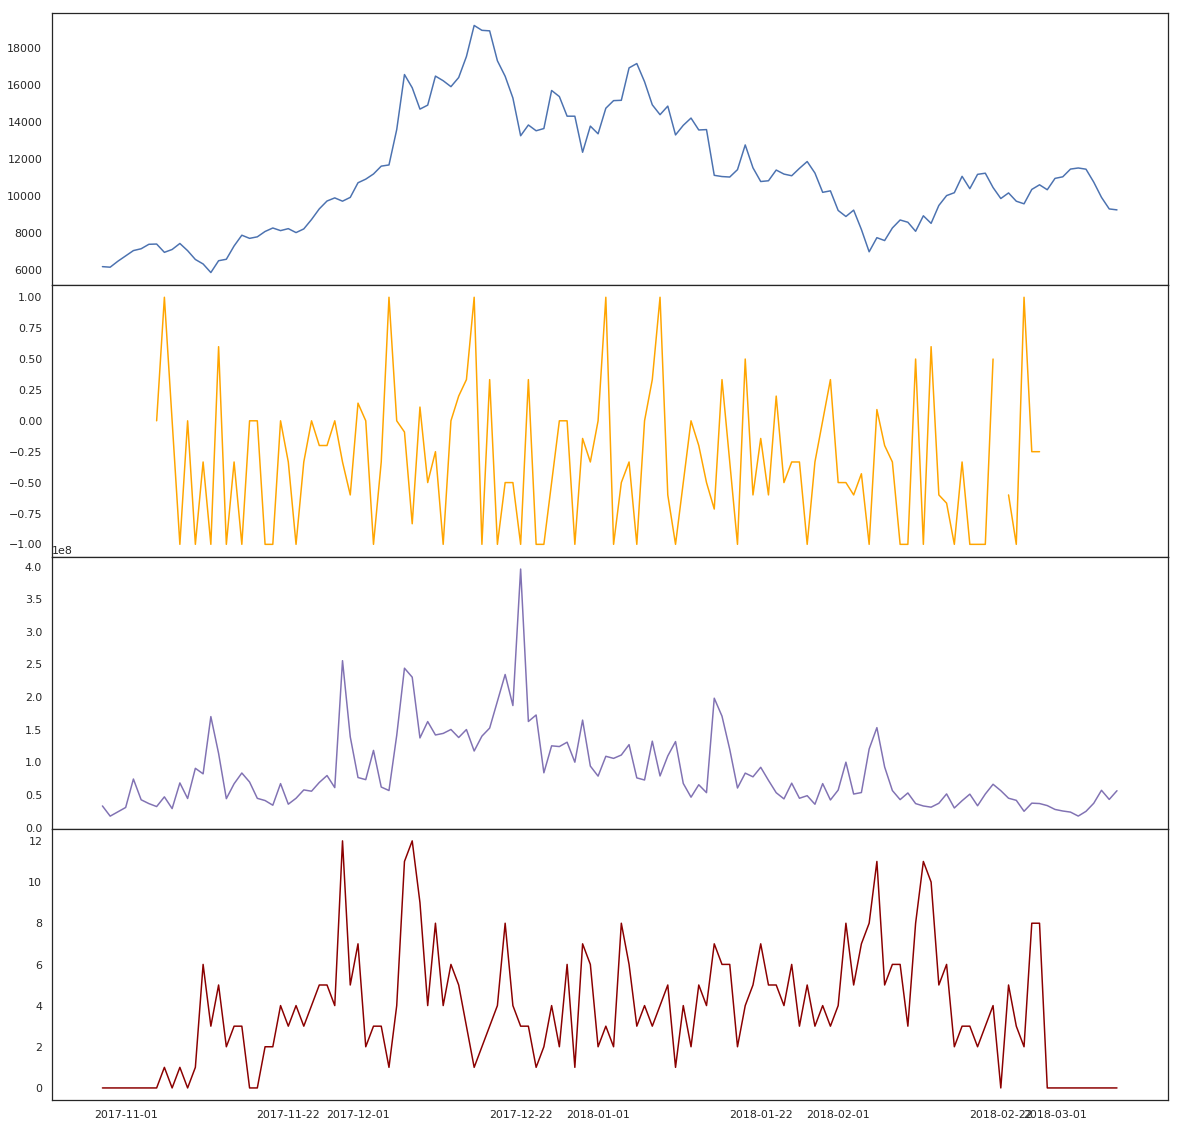

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
f1, ax = plt.subplots(4,1,sharex=True, figsize=(20, 20))
f1.subplots_adjust(hspace=0)

#df_coin['PvsN']=df_coin["positive"]-df_coin["negative"]
#df_coin['ema_13']=df_coin.PvsN.ewm(span=5, adjust=False).mean()

ax[0].plot(df_coin["timestamp"][:132],df_coin["close"][:132])
ax[1].plot(df_coin["timestamp"][:132],df_coin["positive"][:132]-df_coin["negative"][:132],color='orange')
#ax[1].plot(df_coin["timestamp"][:132],df_coin["ema_13"][:132],color='m')
ax[2].plot(df_coin["timestamp"][:132],df_coin["volumeto"][:132],color='m')
ax[3].plot(df_coin["timestamp"][:132],df_coin["samples"][:132],color='darkred')

#ax[2].bar(df_coin["timestamp"][:132],df_coin["positive"][:132],color='lightgreen')
#ax[2].bar(df_coin["timestamp"][:132],-df_coin["negative"][:132],color='salmon')

#for i in range(len(df_coin['close'])):
#  if df_coin['samples'][i] >= 5 and df_coin['positive'][i] >= 0.60:
#    ax[2].bar(df_coin["timestamp"][i],df_coin["positive"][i],color='green')
#  if df_coin['samples'][i] >= 5 and df_coin['negative'][i] >= 0.60:
#    ax[2].bar(df_coin["timestamp"][i],-df_coin["negative"][i],color='red')   
#sns.set(style="white")



plt.show()


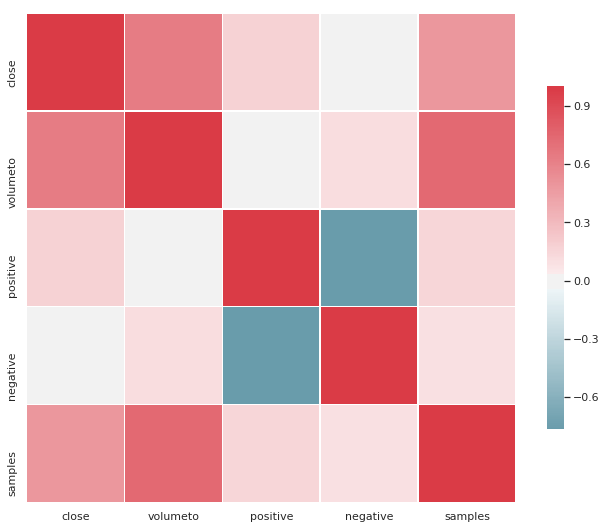

In [66]:
correlation = df_coin.corr()
#cor

sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(correlation, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.show()
